# Métodos Estocásticos II: Métodos de Monte Carlo

* Prof. Esteban Pérez Hidalgo
* Física Computacional I I-2024

<div>
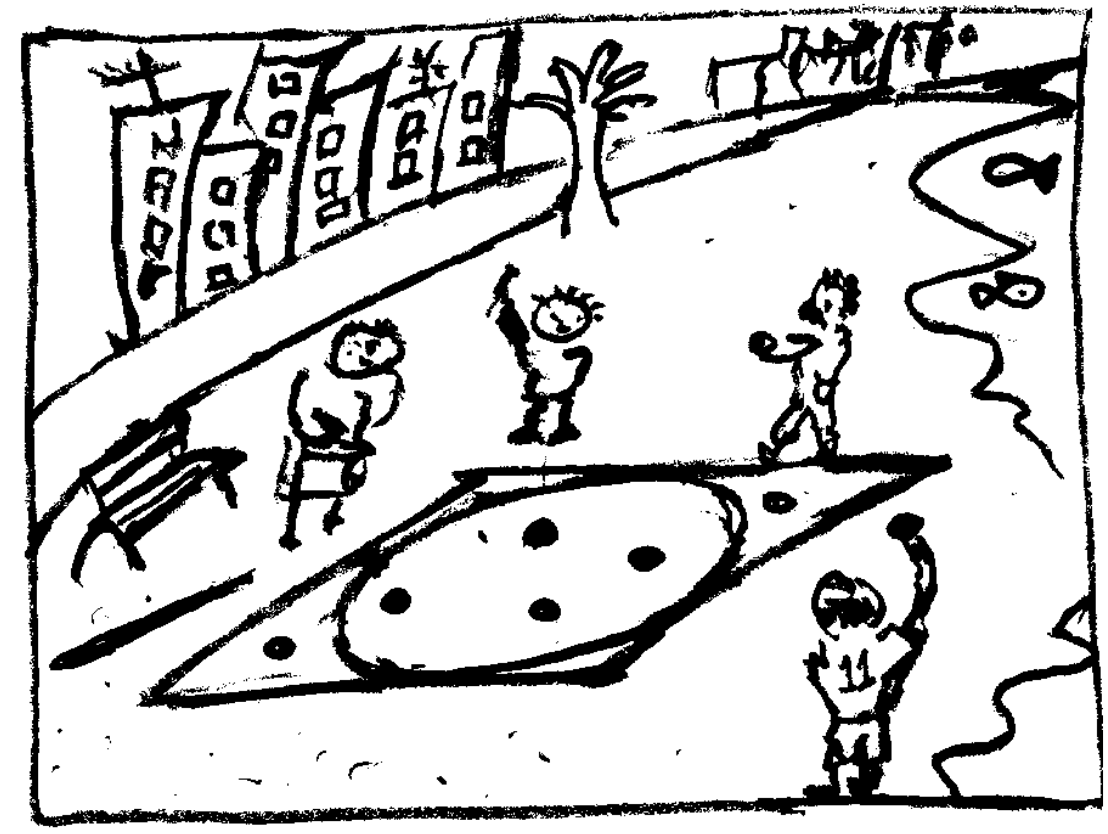
</div>

_Niños calculando $\pi$ en la playa de Monte Carlo_

## Muestreo Directo

Se puede implementar el siguiente algoritmo para calcular $\pi$:

1. nTiros = N
2. nAciertos = 0
3. Para un i desde 0 hasta nTiros:
    4. x = random()
    5. y = random()
    6. Si x^2 + y^2 < 1
        7. nAciertos += 1
    8. Imprima nAciertos
9. Calcule la razón entre nAciertos y nTiros
10. Calcule $\pi$ como cuatro veces la razón entre nAciertos y nTiros
    
- Para un cuadrado de lado 2r:
    - Área de cuadrado: $4r^2$, si se toma un cuarto del cuadrado: $A_{cuadrado} = r^2$

- Área del círculo: $\pi r^2$, si se toma un cuarto del circulo: $A_c = \dfrac{\pi}{4}r^2$
            
$$
\dfrac{A_c}{A_{cuadrado}} = \dfrac{nAciertos}{nTiros}= \dfrac{\pi}{4}
$$

Área por el método Monte Carlo	3.16400
Área del círculo unitario 	3.14159
Error 				0.71325 %


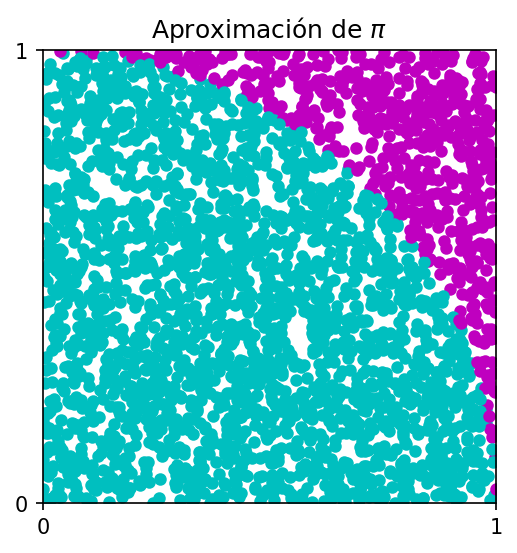

In [6]:
import numpy as np
import matplotlib.pyplot as plt

"""
Método de Monte Carlo para calcular el área de un círculo unitario
"""
# Generar números aleatorios con una semilla determinada
# np.random.seed(32423)

rng = np.random.default_rng()

# Total de números aleatorios a generar
nNumeros = 3000
nAciertos = 0

# Gráfico
fig, ax = plt.subplots(1, 1, dpi=150)

# Ciclo 
for iContador in range(nNumeros):
    xAleatorio = rng.random()
    yAleatorio = rng.random()

    if xAleatorio**2 + yAleatorio**2 <= 1:
        nAciertos += 1
        ax.scatter(xAleatorio, yAleatorio, c='c', s=25)
    else:
        ax.scatter(xAleatorio, yAleatorio, c='m', s=25)
    
areaMonteCarlo = 4*nAciertos/nNumeros
areaUnitario = np.pi

print('Área por el método Monte Carlo\t{:.5f}'.format(areaMonteCarlo))
print('Área del círculo unitario \t{:.5f}'.format(areaUnitario))
print('Error \t\t\t\t{:.5f} %'.format(100*abs(areaUnitario - areaMonteCarlo)/areaUnitario))

# Parámetros del gráfico
ax.set_title('Aproximación de $\pi$')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_aspect('equal')

## Integración por métodos de Monte Carlo

### Integración por valor medio: 

- Se tiene el teorema del valor intermedio
$$
\int_a^b f(x)\mathrm{d}x = (b -a)\langle f\rangle
$$

- Se usa la técnica de Monte Carlo para calcular el valor medio de f:
$$
\langle f\rangle \simeq \dfrac{1}{N}\sum_{i=1}^N f(x_i)
$$

donde los $x_i$ son una secuencia uniforme de números aleatorios que cumplen: $a < x_i < b$

$$
\int_a^b f(x)\mathrm{d}x \simeq \dfrac{(b-a)}{N}\sum_{i=1}^N f(x_i)
$$

Donde conforme $N \rightarrow \infty$ el error en el valor obtenido decrece como $\dfrac{1}{\sqrt N}$

## Monte Carlo multidimensional

Se puede generalizar la integración por valor medio a muchas dimensiones.
Ahora se toman toman puntos aleatorios en un espacio multidimensional. Por ejemplo, en 2D:
$$
\int_a^b\mathrm{d}x\int_c^d\mathrm{d}y f(x,y) \simeq (b-a)(d-c)\dfrac{1}{N}\sum_{i}^N f(\vec x_i) = (b-a)(d-c)\langle f \rangle
$$

### Ejemplo

$$
\int_0^1 \exp{(\sqrt{x^3 + 5x})} \mathrm{d}x\\
$$

In [16]:
import math
from scipy import integrate

resultado =  5.50826 # Wolfran alpha https://www.wolframalpha.com/input?i=int_0%5E1+exp%28sqrt%28x%5E3+%2B+5x%29%29+dx

a = 0
b = 1

def integrand(x):
    return math.exp(math.sqrt(x**3 + 5*x))

def monte_carlo_integration(n,a,b):
    sum = 0.0
    for i in range(n):
        x = rng.uniform(a, b)  # generate a random point between a and b
        sum += integrand(x)  # evaluate the integrand at the random point
    avg = sum / n  # compute the average of the function values
    return avg

n = 10000  # number of random points to use

estimate_Monte_Carlo = monte_carlo_integration(n,a,b)
resultado_valor_medio = estimate_Monte_Carlo * (b-a)  # multiply by the width of the integration range
resultado_scipy_quad = integrate.quad(integrand, 0, 1)

error = 100*abs((estimate_Monte_Carlo-resultado_scipy_quad[0])/resultado_scipy_quad[0])

print(f'Resultado por quad: {resultado_scipy_quad[0]:.5f}')
print(f'Resultado por valor medio: {resultado_valor_medio:.5f}')
print(f'Estimado por método de Monte Carlo: {estimate_Monte_Carlo:.5f}')
# print('Resultado exacto: {}'.format(resultado_scipy_quad))
print(f'Porcentaje de error: {error:.5f} %')

Resultado por quad: 5.50826
Resultado por valor medio: 5.47334
Estimado por método de Monte Carlo: 5.47334
Porcentaje de error: 0.63395 %


## Formas de aumentar la eficiencia de la integración usando las técnicas de Monte Carlo

### Método de reducción de la varianza

Se trata de obtener una función más plana donde se aplique mejor la técnica de Monte Carlo.
Suponga una función $g(x)$ que cumpla las siguientes propiedades:
$$
|f(x)-g(x)|\leq \epsilon, \> \int_a^b\mathrm{d}x~g(x) = J
$$

Ahora se evalúa la integral de $f(x) - g(x)$ y se suma J al resultado para obtener la integral requerida:
$$
\int_a^b \mathrm{d}x~f(x) = \int_a^b\mathrm{d}x~[f(x)-g(x)]+J
$$

Si se encuentra una $g(x)$ tal que la varianza de $f(x)-g(x)$ es menor que la de $f(x)$ y que sea integrable analíticamente, se obtienen resultados más precisos en menos tiempo.

### Muestreo por importancia

Este método nos permite hacer un muestreo de las regiones más importantes del integrando. 

Para una función $g(x)$ se calcula su valor esperado con una función de pesos $w(x)$ en el intervalo de _a_ a _b_:

$$
\langle g(x) \rangle_w = \frac{\int_a^b w(x)g(x)\mathrm{d}x}{\int_a^b w(x)\mathrm{d}x}
$$

Ahora se considera la integral:
$$
I = \int_a^b f(x)~\mathrm{d}x
$$

Se define: $g(x) = \dfrac{f(x)}{w(x)}$ y se calcula su valor esperado con los pesos $w(x)$:

$$
\Big\langle \dfrac{f}{w}\Big\rangle = \frac{\int_a^b w(x)f(x)/w(x)\mathrm{d}x}{\int_a^b w(x)\mathrm{d}x}= \frac{\int_a^b f(x)\mathrm{d}x}{\int_a^b w(x)\mathrm{d}x} = \dfrac{I}{\int_a^b w(x)\mathrm{d}x}
$$

Finalmente:

$$
I = \Big\langle \dfrac{f}{w}\Big\rangle \int_a^bw(x)\mathrm{d}x \simeq \dfrac{1}{N}\sum_{i=1}^N\dfrac{f(x_i)}{w(x_i)}\int_a^bw(x)\mathrm{d}x
$$

La función $w(x)$ se usa como la distribución de probabilidad para nuestros números aleatorios.

- La idea detrás del muestreo de importancia es utilizar una distribución de muestreo que sea más eficiente que la distribución de probabilidad original. 
- En lugar de muestrear aleatoriamente de la distribución original, se muestrea de la distribución de importancia, que está diseñada para aumentar la frecuencia de los eventos raros o críticos.

### Ejemplo

In [17]:
import numpy as np

# Define the function to be integrated
def f(x):
    return np.sin(x) / x

# Define the sampling distribution
def p(x):
    return np.exp(-x)

# Define the true value of the integral for comparison
true_val = 1.605412976802694

# Define the number of samples to generate
n_samples = 1000000

# Generate n_samples samples from the sampling distribution
samples = np.random.exponential(size=n_samples)

# Calculate the importance weights
weights = f(samples) / p(samples)

# Calculate the integral estimate with importance sampling
integral = np.mean(weights)

# Calculate the variance reduction factor
var_red = np.var(weights) / np.var(f(samples))

# Print the results
print("Integral estimate with importance sampling: ", integral)
print("True value of the integral: ", true_val)
print("Variance reduction factor: ", var_red)

Integral estimate with importance sampling:  1.52692248392472
True value of the integral:  1.605412976802694
Variance reduction factor:  21912.7352358197


## Simulaciones por medio de las técnicas de Monte Carlo (Newman $\S$ 10.3)

### Simulaciones en mecánica estadística

El problema fundamental de la mecánica estadística es calcular el valor esperado de una cantidad de interés en un sistema físico en equilibrio termodinámico a una temperatura _T_

### Estadística de Maxwell-Boltzmann:
- Partículas distinguibles / sistema clásico
- No hay restricción para el número de partículas que ocupen un mismo estado energético.

La probabilidad de que el sistema ocupe el estado _i_ con energía $E_i$ es:

\begin{align}
    P(E_i) &= \dfrac{e^{-\beta E_i}}{Z}\\
\end{align}

Donde $Z = \sum_i e^{-\beta E_i}$ y $\beta = \dfrac{1}{k_B T}$


Por lo tanto

\begin{align}
    \langle X \rangle &= \sum_i X_i P(E_i)\\
\end{align}

- Para $N \sim 10^{23}$ la suma no se puede hacer de maner analítica por lo que se recurre a un cálculo numérico.
- Se aplica la técnica de Monte Carlo.


## Aplicación de la técnica de Monte Carlo

- Se aplica la técnica de Monte Carlo para calcular el valor esperado de la variable de interés X (energía, magnetización, capacidad calorífica, entre otras).
- Para el caso de una sumatoria, a diferencia del caso de la integral, se toma un conjunto aleatorio de términos y se suman.

De esta manera, para un número _N_ de estados aleatorios del sistema:

\begin{align}
    \langle X \rangle \simeq \dfrac{\displaystyle \sum_{k=1}^N X_k P(E_k)}{\displaystyle \sum_{k=1}^N P(E_k)}
\end{align}

- La función de probabilidad $P(E_k)$ se hace pequeña para estados donde $E_k >> k_B T$
- Hacer un muestreo de estados aleatorio a partir de una distribución uniforme no es adecuado.

Se aplica un muestreo por importancia:

\begin{align}
    \left\langle \dfrac{X_i P(E_i)}{w_i} \right\rangle &= \dfrac{\displaystyle \sum_i w_i \frac{X_i P(E_i)}{w_i}}{\sum_i w_i} = \dfrac{\displaystyle \sum_i X_i P(E_i)}{\sum_i w_i} = \dfrac{\langle X \rangle}{\sum_i w_i}\\
    \langle X \rangle &= \left\langle \dfrac{X_i P(E_i)}{w_i} \right\rangle \displaystyle\sum_i w_i
\end{align}

Finalmente

\begin{align}
    \langle X \rangle &\simeq \frac{1}{N} \sum_{k=1}^N \dfrac{X_k P(E_k)}{w_k} \sum_{i=1}^N w_i
    \label{mc}
\end{align}

### Condiciones que debe satisfacer la función de pesos $w_i$
- Debe parecerse a la función $P(E_i)$
- La suma de la función debe poderse calcular analíticamente
- Tome $w_i = P(E_i)$

Así, la ecuación se simplifica como 

\begin{align}
    \langle X \rangle &\simeq \frac{1}{N} \sum_{k=1}^N X_k
    \label{aproxMC}
\end{align}

## Algoritmo Metrópolis

- Se permite que un estado pueda ser visitado varias veces.
- Hay probabilidad de quedarse en el mismo estado: $T_{ii} \neq 0$
- Se escoge uno de los estados para el próximo paso usando una distribución uniforme.
- Se acepta o se rechaza el nuevo estado con probabilidad:
\begin{align}
    P_a = \begin{cases}
        1 & \text{si $E_j \leq E_i$,}\\
        e^{-\beta(E_j - E_i)} & \text{si $E_j$ > $E_i$}
      \end{cases}
      \label{pa}
\end{align}

Es decir:
- Se acepta el cambio de estado si la energía del nuevo estado es menor o igual a la energía actual.
- Si la nueva energía es mayor, se acepta el cambio con probabilidad $e^{-\beta(E_j - E_i)}$


### Algoritmo
1. Se elige un estado inicial
2. Se escoge mediante una distribución aleatoria uniforme un estado entre el conjunto de estados posibles.
3. Se calcula la probabilidad de aceptación $P_a$:

\begin{align}
P_a = \begin{cases}
        1 & \text{si $E_j \leq E_i$,}\\
        e^{-\beta(E_j - E_i)} & \text{si $E_j$ > $E_i$}
      \end{cases}
\end{align}

4. Usando la probabilidad $P_a$ se acepta el movimiento o se rechaza
5. Se mide la cantidad de interés X y se acumula.
6. Se repite desde el paso 2.

### Ejemplo: Simulación de un gas ideal

Se define un gas de partículas con masa $m$ confinadas a una caja cúbica de longitud $L$. Los estados de este sistema cuántico se definen usando tres números cuánticos enteros $n_x$, $n_y$ y $n_z$.
La energía del sistema está determinada por:
\begin{equation}
E_i(n_x, n_y, n_z) = \dfrac{\pi^2 \hbar^2}{2mL}(n_x^2 + n_y^2 + n_z^2)
\label{E}
\end{equation}

Para un gas en el que no hay interacción entre partículas, la energía total del sistema es la suma de las energías de cada partícula:
\begin{equation}
E = \sum_{i=1}^{N}E_i(n_x, n_y, n_z)
\end{equation}

- Se va a usar la simulación de Monte Carlo del gas ideal para encontrar la energía interna del gas.
- Para implementar el algoritmo Metrópolis debe establecerse un conjunto de posibles "movimientos" del sistema. Los posibles estados del sistema serán aquellos donde los números cuánticos difieren por $\pm 1$ respecto al estado original.
- Calcule $\Delta E$ cuando el número cuántico $n_x$ de la partícula $i$ cambia en $\pm 1$

- Se escribe una rutina que calcula la simulación para $N = 1000$ partículas cuando $k_BT = 10$. Para simplificar los cálculos se toma un sistema de unidades donde $m = \hbar = 1$ y se establece el largo de la caja como $L = 1$

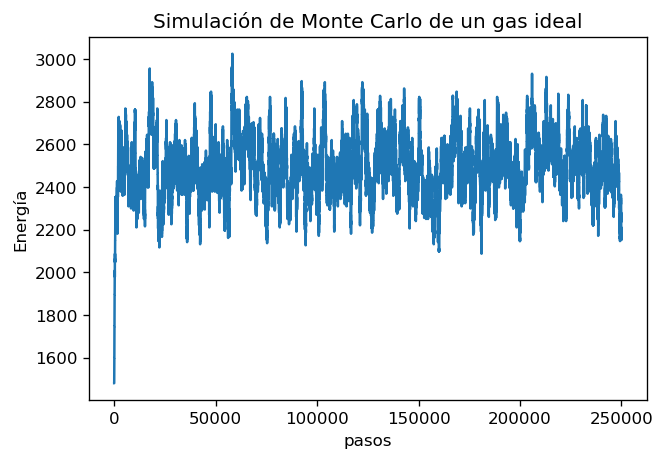

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
temperatura = 10.0
nParticulas = 100
nPasos = 250000

# Arreglo para almacenar los números cuánticos
arregloEstados = np.ones([nParticulas, 3], np.int32)

# Ciclo principal
listaGrafico = []
valorE = 3*nParticulas*(np.pi**2)/2

for k in range(nPasos):
    
    # Se escoge la partícula a "mover"
    iPart = np.random.randint(nParticulas)
    jNumCuantico = np.random.randint(3)
    
    # Comentario faltante
    if np.random.random() < 0.5:
        deltaN = +1
        deltaE = (2*arregloEstados[iPart, jNumCuantico]+1)*(np.pi**2)/2
    else:
        deltaN = -1
        deltaE = (-2*arregloEstados[iPart, jNumCuantico]+1)*(np.pi**2)/2

    # Comentario faltante
    if arregloEstados[iPart, jNumCuantico] > 1 or deltaN == +1:
        if np.random.random() < np.exp(-deltaE/temperatura):
            arregloEstados[iPart, jNumCuantico] += deltaN
            valorE += deltaE
            
    listaGrafico.append(valorE)
    
# Gráfico
fig, ax = plt.subplots(dpi=120)
ax.plot(listaGrafico)
ax.set_title('Simulación de Monte Carlo de un gas ideal')
ax.set_xlabel('pasos')
ax.set_ylabel('Energía')
plt.show()

- Otras cantidades que pueden calcularse incluyen: capacidad calorífica, entropía, energía libre, presión, magnetización.

## Referencias

- Krauth, W.(2006). Statistical Mechanics: Algorithms and Computations. Oxford Master Series in Physics. Oxford University Press, UK.
- Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). A Survey of Computational
Physics: Introductory Computational Science. Princeton: Princeton
University Press.
- Newman, M. (2013). Computational Physics. Michigan: University of Michigan.